In [1]:
import ROOT
import os
work_dir = '/'.join([os.environ["CMSSW_BASE"], 'src', 'Analysis', 'VVAnalysis'])
print work_dir
os.chdir(work_dir)

Welcome to JupyROOT 6.12/07
/afs/hep.wisc.edu/cms/kdlong/WZAnalysis/CMSSW_10_4_0_patch1/src/Analysis/VVAnalysis


In [2]:
DY_xsec = 5765.4 # in pb
lumi = 35.9*1000

In [3]:
%run ./Utilities/scripts/makeHistFile.py --noHistConfig --test -f test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root -s TightWithLooseVeto -o testZ.root -a Zstudy

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root
INFO: using simple file test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
rtfile = ROOT.TFile("testZ.root")
rtfile.ls()
rtfile.cd("test")
rtfile.ls()

TFile**		testZ.root	
 TFile*		testZ.root	
  KEY: TDirectoryFile	test;1	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root
TFile**		testZ.root	
 TFile*		testZ.root	
  TDirectoryFile*		test	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root
   KEY: TDirectoryFile	9D8BBBB2-187D-CE49-9CAE-009ADB180509.root;1	9D8BBBB2-187D-CE49-9CAE-009ADB180509.root
   KEY: TH1D	cutflow_ee;1	Tight leptons
   KEY: TH1D	cutflow_mm;1	Tight leptons
   KEY: TH1D	ZMass_ee;1	Tight leptons
   KEY: TH1D	ZMass_mm;1	Tight leptons
   KEY: TH1D	ptl1_ee;1	Tight leptons
   KEY: TH1D	ptl1_mm;1	Tight leptons
   KEY: TH1D	ptl2_ee;1	Tight leptons
   KEY: TH1D	ptl2_mm;1	Tight leptons
   KEY: TH1D	sumweights;1	sumweights
  KEY: TDirectoryFile	test;1	test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root


In [5]:
sumWeightsProcessed = rtfile.Get("test/sumweights").Integral()
print sumWeightsProcessed

2174367.0


In [15]:
hist_ZMass_ee = rtfile.Get("test/ZMass_ee")
hist_ZMass_mm = rtfile.Get("test/ZMass_mm")
hist_ZMass_ee.SetLineColor(ROOT.kGreen-6)
hist_ZMass_mm.SetLineColor(ROOT.kBlue)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


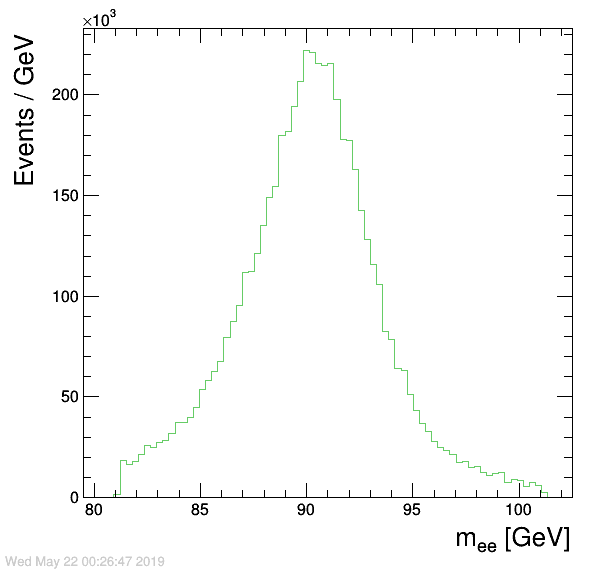

In [16]:
canvas = ROOT.TCanvas("canvas", "canvas")
hist_ZMass_ee.Draw("hist")
hist_ZMass_ee.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_ee.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

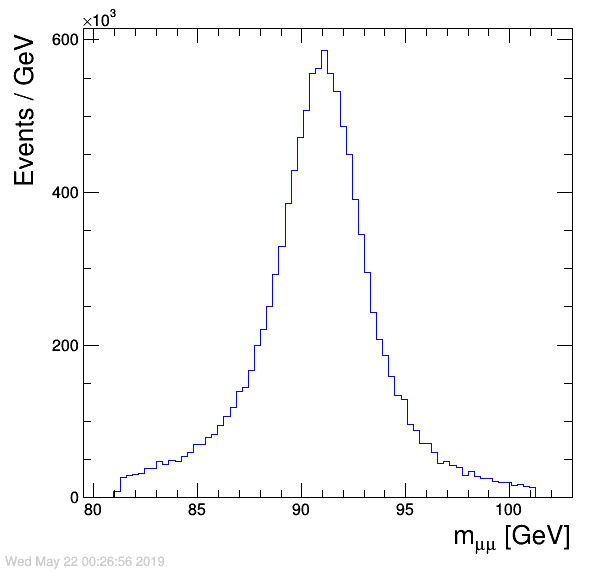

In [17]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_mm.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_mm.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

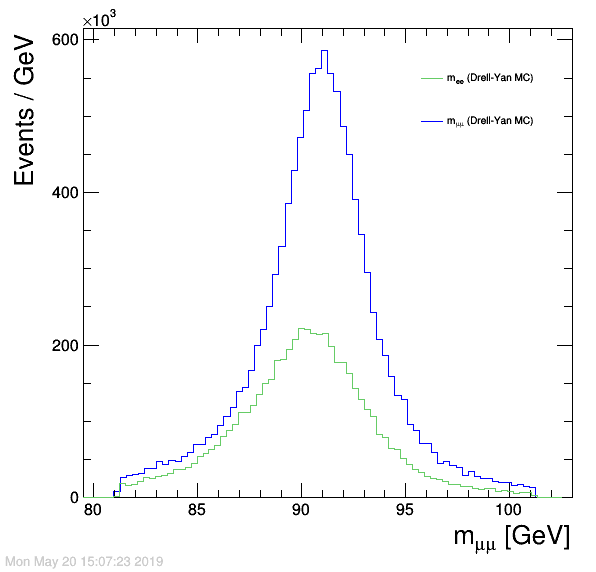

In [9]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ZMass_ee, "m_{ee} (Drell-Yan MC)", "l")
legend.AddEntry(hist_ZMass_mm, "m_{#mu#mu} (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

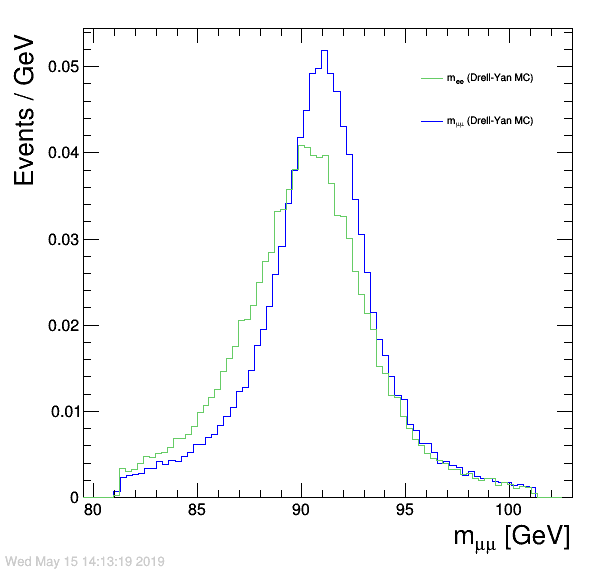

In [114]:
hist_ZMass_mm.Scale(1/hist_ZMass_mm.Integral())
hist_ZMass_ee.Scale(1/hist_ZMass_ee.Integral())
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend.Draw()
canvas.Draw()

In [19]:
hist_ptl1_ee = rtfile.Get("Unknown/ptl1_ee")
hist_ptl1_mm = rtfile.Get("Unknown/ptl1_mm")
hist_ptl1_ee.SetLineColor(ROOT.kGreen-6)
hist_ptl1_mm.SetLineColor(ROOT.kBlue)

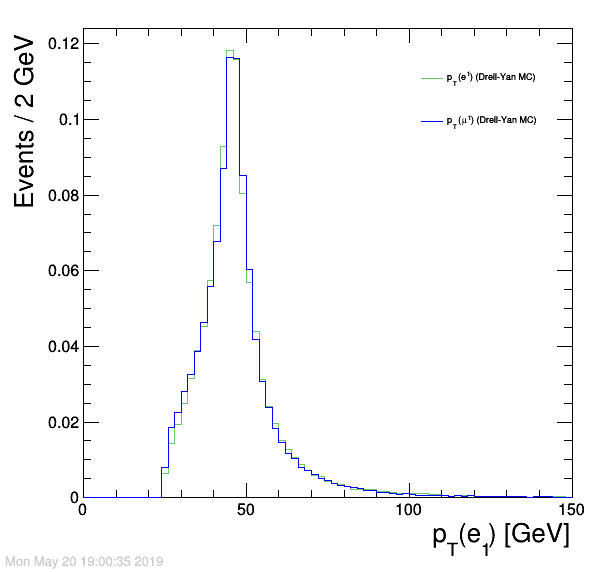

In [20]:
hist_ptl1_mm.Scale(1/hist_ptl1_mm.Integral())
hist_ptl1_ee.Scale(1/hist_ptl1_ee.Integral())
hist_ptl1_ee.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_mm.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_ee.Draw("hist")
hist_ptl1_mm.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ptl1_ee, "p_{T}(e^{1}) (Drell-Yan MC)", "l")
legend.AddEntry(hist_ptl1_mm, "p_{T}(#mu^{1}) (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

In [24]:
print hist_ptl1_ee.GetNbinsX()
print hist_ptl1_ee.Integral()

100
1.0


In [25]:
print hist_ptl1_mm.GetNbinsX()
print hist_ptl1_mm.Integral()

100
1.0


In [95]:
%run ./Utilities/scripts/makeHistFile.py --noHistConfig --test -f test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root -s TightWithLooseVeto -o testZskim.root -a Zstudy

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
INFO: using simple file test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root


INFO: Using default name "Unknown" for file


In [96]:
skimfile = ROOT.TFile("testZskim.root")
skimfile.cd("Unknown")

True

In [97]:
hist_ZMass_ee = rtfile.Get("Unknown/ZMass_ee")
hist_ZMass_mm = rtfile.Get("Unknown/ZMass_mm")
histskim_ZMass_ee = skimfile.Get("Unknown/ZMass_ee")
histskim_ZMass_mm = skimfile.Get("Unknown/ZMass_mm")

118725.0
118725.0


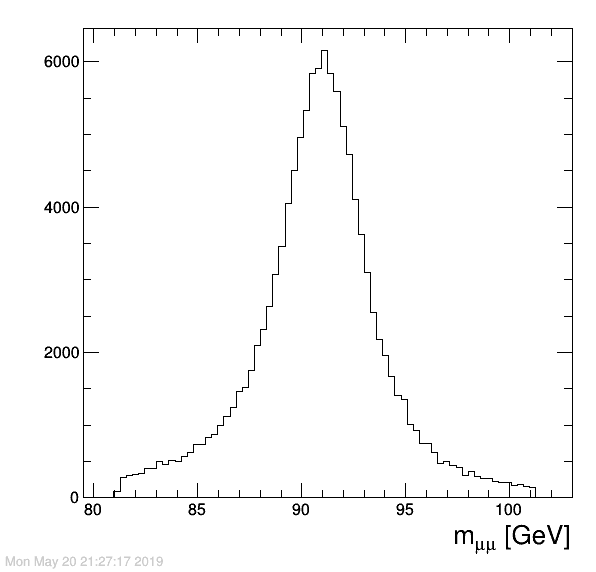

In [98]:
histskim_ZMass_mm.Draw("hist")
hist_ZMass_mm.Draw("hist same")
print histskim_ZMass_mm.Integral()
print hist_ZMass_mm.Integral()
canvas.Draw()

57071.0
57071.0


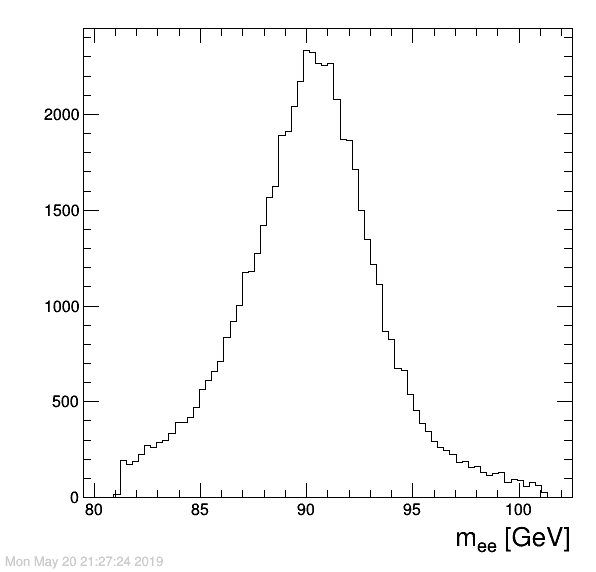

In [99]:
histskim_ZMass_ee.Draw("hist")
hist_ZMass_ee.Draw("hist same")
print histskim_ZMass_ee.Integral()
print hist_ZMass_ee.Integral()
canvas.Draw()

In [100]:
hist_cutflow_mm = rtfile.Get("Unknown/cutflow_mm")
hist_cutflow_ee = rtfile.Get("Unknown/cutflow_ee")
histskim_cutflow_ee = skimfile.Get("Unknown/cutflow_ee")
histskim_cutflow_mm = skimfile.Get("Unknown/cutflow_mm")

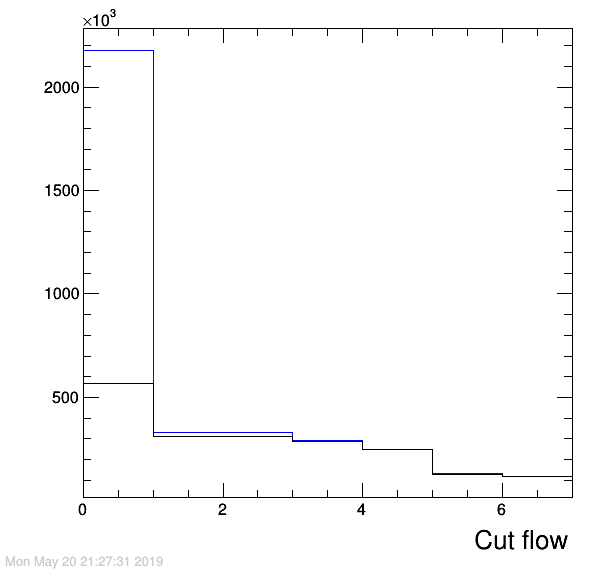

In [101]:
hist_cutflow_mm.SetLineColor(ROOT.kBlue)
hist_cutflow_mm.Draw("hist")
histskim_cutflow_mm.Draw("hist same")
canvas.Draw()

In [102]:
print histskim_cutflow_mm.GetBinContent(1)
print hist_cutflow_mm.GetBinContent(1)

569351.0
2174367.0


In [106]:
print histskim_cutflow_ee.GetBinContent(1)
print hist_cutflow_ee.GetBinContent(1)
print histskim_cutflow_ee.GetBinContent(5)
print hist_cutflow_ee.GetBinContent(5)

569351.0
2174367.0
109577.0
109577.0


In [6]:
%run ./Utilities/scripts/makeHistFile.py --test -f DYm50 -s NanoDileptonSkim --output_selection TightWithLooseVeto -o testZfullsample.root -a Zstudy_2016 --noHistConfig

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset DYm50


In [7]:
fullfile = ROOT.TFile("testZfullsample.root")
hist_ZMass_ee = fullfile.Get("DYm50/ZMass_ee")
hist_ZMass_mm = fullfile.Get("DYm50/ZMass_mm")
hist_ZMass_onefile_ee = rtfile.Get("test/ZMass_ee")
hist_ZMass_onefile_mm = rtfile.Get("test/ZMass_mm")
hist_ZMass_ee.SetLineColor(ROOT.kGreen-6)
hist_ZMass_mm.SetLineColor(ROOT.kBlue)
sumWeightsProcessedFull = fullfile.Get("DYm50/sumweights").Integral()
print sumWeightsProcessedFull
print sumWeightsProcessed
fullfile.ls()

13108278.0
2174367.0
TFile**		testZfullsample.root	
 TFile*		testZfullsample.root	
  TDirectoryFile*		DYm50	DYm50
   OBJ: TH1D	ZMass_ee	Tight leptons : 0 at: 0xad82260
   OBJ: TH1D	ZMass_mm	Tight leptons : 0 at: 0x8f64ba0
   OBJ: TH1D	sumweights	sumweights : 0 at: 0x8f7c0b0
   KEY: TH1D	cutflow_ee;1	Tight leptons
   KEY: TH1D	cutflow_mm;1	Tight leptons
   KEY: TH1D	ZMass_ee;1	Tight leptons
   KEY: TH1D	ZMass_mm;1	Tight leptons
   KEY: TH1D	ptl1_ee;1	Tight leptons
   KEY: TH1D	ptl1_mm;1	Tight leptons
   KEY: TH1D	ptl2_ee;1	Tight leptons
   KEY: TH1D	ptl2_mm;1	Tight leptons
   KEY: TH1D	sumweights;1	sumweights
  KEY: TDirectoryFile	DYm50;1	DYm50


57071.0
342920.0
15.7898588968
5432584.95372
342920.0
5414658.41289


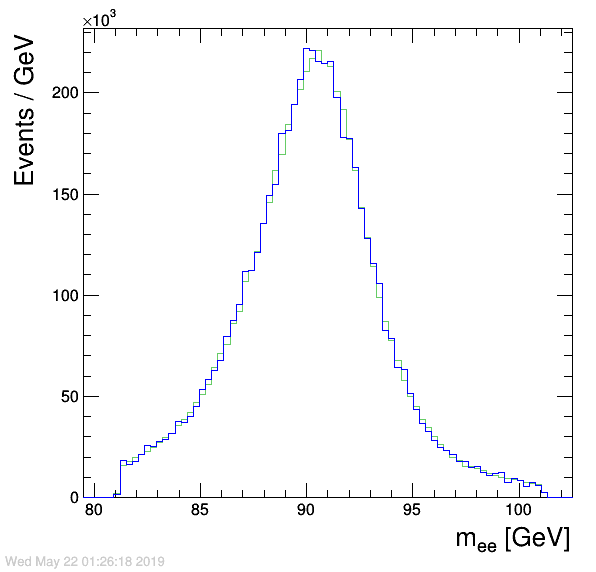

In [8]:
canvas = ROOT.TCanvas("canvas", "canvas")
hist_ZMass_ee.Draw("hist")
hist_ZMass_ee.GetYaxis().SetTitle("Events / GeV")
print hist_ZMass_onefile_ee.Integral()
print hist_ZMass_ee.Integral()
hist_ZMass_ee.Scale(DY_xsec*lumi/sumWeightsProcessedFull)
hist_ZMass_onefile_ee.Scale(DY_xsec*lumi/sumWeightsProcessed)
print DY_xsec*lumi/sumWeightsProcessedFull
print hist_ZMass_onefile_ee.Integral()
print hist_ZMass_ee.GetEntries()
print hist_ZMass_ee.Integral()
hist_ZMass_onefile_ee.SetLineColor(ROOT.kBlue)
hist_ZMass_onefile_ee.Draw("hist same")
canvas.Draw()

In [5]:
#rtfile = ROOT.TFile("testZ_withData.root")
rtfile = ROOT.TFile("testZ_withDataTrigger.root")
rtfile_notrig = ROOT.TFile("testZ_withData.root")
rtfile.ls()
canvas = ROOT.TCanvas("c", "c")

TFile**		testZ_withDataTrigger.root	
 TFile*		testZ_withDataTrigger.root	
  KEY: TDirectoryFile	data_DoubleMuon_Run2016B-22Aug2018_ver2-v1;1	data_DoubleMuon_Run2016B-22Aug2018_ver2-v1
  KEY: TDirectoryFile	DYm50;1	DYm50


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


DY MC sumweights 13108278.0
DY MC entries 672463.0
DY MC integral 10618095.8833
Data events 1930607.0
Scaled MC events 10618095.8833


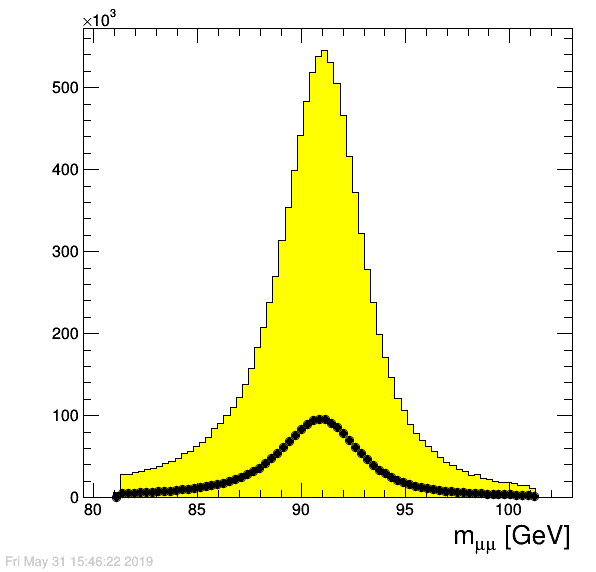

In [19]:
hist_DY_ZMass_mm = ROOT.TH1D()
hist_DY_ZMass_mm = rtfile.Get("DYm50/ZMass_mm").Clone()
hist_DY_ZMass_mm.SetFillColor(ROOT.kYellow)
sumWeightsDY = rtfile.Get("DYm50/sumweights").Integral()
hist_DY_ZMass_mm.Scale(DY_xsec*lumi/sumWeightsDY)
print "DY MC sumweights", sumWeightsDY
print "DY MC entries", hist_DY_ZMass_mm.GetEntries()
print "DY MC integral", hist_DY_ZMass_mm.Integral()
hist_DY_ZMass_mm.Draw("hist")
hist_dataDoubleMu_ZMass_mm = rtfile.Get("data_DoubleMuon_Run2016B-22Aug2018_ver2-v1/ZMass_mm")
hist_dataDoubleMu_ZMass_mm.SetMarkerStyle(20)
hist_dataDoubleMu_ZMass_mm.SetMarkerSize(1)
hist_dataDoubleMu_ZMass_mm.SetMarkerColor(ROOT.kBlack)
hist_dataDoubleMu_ZMass_mm.Draw("e1 same")
print "Data events", hist_dataDoubleMu_ZMass_mm.Integral()
print "Scaled MC events", hist_DY_ZMass_mm.Integral()
canvas.Draw()

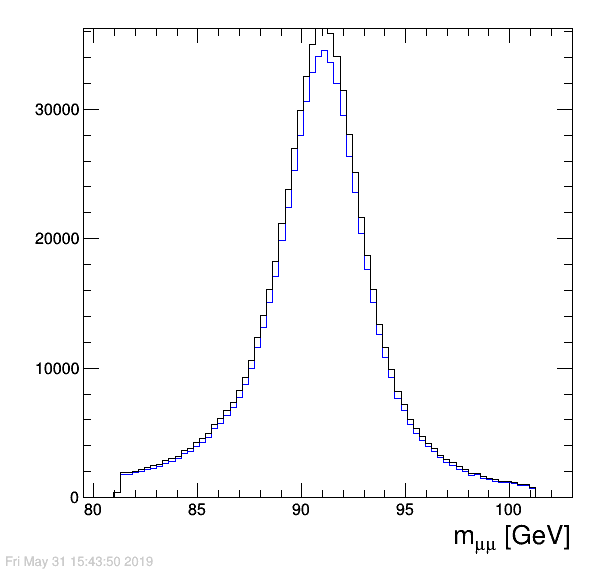

In [9]:
hist_DY_ZMass_mm = rtfile.Get("DYm50/ZMass_mm").Clone()
hist_DY_ZMass_mm_notrig = rtfile_notrig.Get("DYm50/ZMass_mm").Clone()
hist_DY_ZMass_mm.SetLineColor(ROOT.kBlue)
hist_DY_ZMass_mm.Draw("hist")
hist_DY_ZMass_mm_notrig.Draw("same hist")
canvas.Draw()

DY MC sumweights 13108278.0
DY MC entries 672463.0
DY MC integral 10595200.5879
Data events 1926487.0
Scaled MC events 10595200.5879


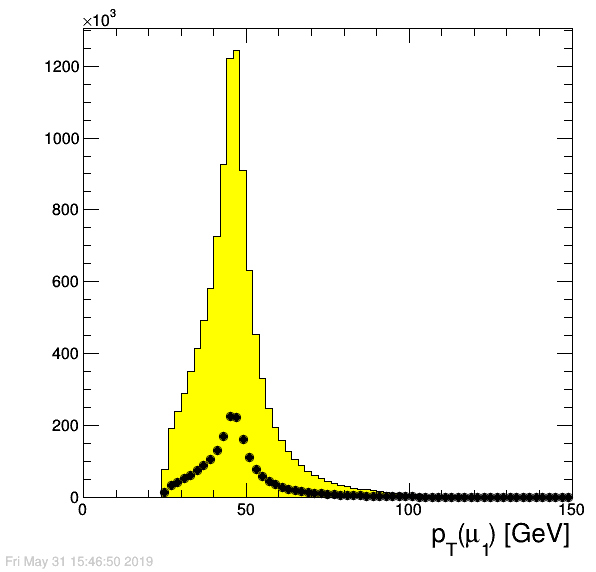

In [20]:
hist_DY_ZMass_mm = ROOT.TH1D()
hist_DY_ZMass_mm = rtfile.Get("DYm50/ptl1_mm").Clone()
hist_DY_ZMass_mm.SetFillColor(ROOT.kYellow)
sumWeightsDY = rtfile.Get("DYm50/sumweights").Integral()
hist_DY_ZMass_mm.Scale(DY_xsec*lumi/sumWeightsDY)
print "DY MC sumweights", sumWeightsDY
print "DY MC entries", hist_DY_ZMass_mm.GetEntries()
print "DY MC integral", hist_DY_ZMass_mm.Integral()
hist_DY_ZMass_mm.Draw("hist")
hist_dataDoubleMu_ZMass_mm = rtfile.Get("data_DoubleMuon_Run2016B-22Aug2018_ver2-v1/ptl1_mm")
hist_dataDoubleMu_ZMass_mm.SetMarkerStyle(20)
hist_dataDoubleMu_ZMass_mm.SetMarkerSize(1)
hist_dataDoubleMu_ZMass_mm.SetMarkerColor(ROOT.kBlack)
hist_dataDoubleMu_ZMass_mm.Draw("e1 same")
print "Data events", hist_dataDoubleMu_ZMass_mm.Integral()
print "Scaled MC events", hist_DY_ZMass_mm.Integral()
canvas.Draw()

DY MC sumweights 13108278.0
DY MC entries 672463.0
DY MC integral 671013.0
Data events 1926487.0
Scaled MC events 1930607.0


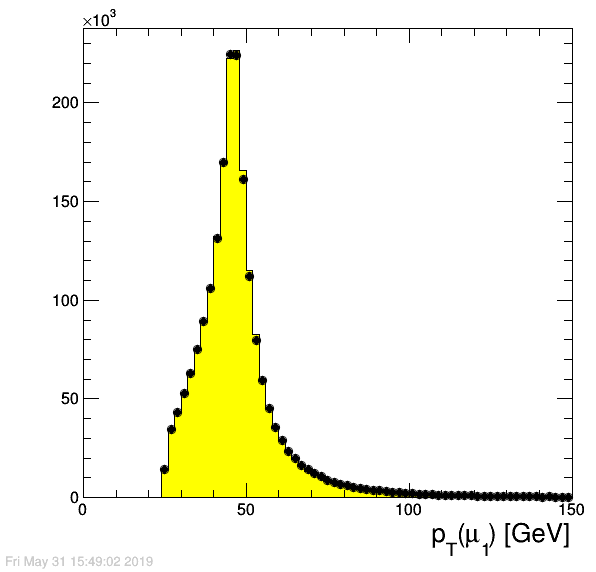

In [21]:
hist_DY_ZMass_mm = ROOT.TH1D()
hist_DY_ZMass_mm = rtfile.Get("DYm50/ptl1_mm").Clone()
hist_DY_ZMass_mm.SetFillColor(ROOT.kYellow)
sumWeightsDY = rtfile.Get("DYm50/sumweights").Integral()
print "DY MC sumweights", sumWeightsDY
print "DY MC entries", hist_DY_ZMass_mm.GetEntries()
print "DY MC integral", hist_DY_ZMass_mm.Integral()
hist_DY_ZMass_mm.Draw("hist")
hist_dataDoubleMu_ZMass_mm = rtfile.Get("data_DoubleMuon_Run2016B-22Aug2018_ver2-v1/ptl1_mm")
hist_dataDoubleMu_ZMass_mm.SetMarkerStyle(20)
hist_dataDoubleMu_ZMass_mm.SetMarkerSize(1)
hist_dataDoubleMu_ZMass_mm.SetMarkerColor(ROOT.kBlack)
hist_DY_ZMass_mm.Scale(hist_dataDoubleMu_ZMass_mm.GetEntries()/hist_DY_ZMass_mm.Integral())
hist_dataDoubleMu_ZMass_mm.Draw("e1 same")
print "Data events", hist_dataDoubleMu_ZMass_mm.Integral()
print "Scaled MC events", hist_DY_ZMass_mm.Integral()
canvas.Draw()